In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import pickle
import pandas as pd
import numpy as np
import math                            #Import Modules
import random
from sklearn import svm


In [2]:
df=pd.read_csv("ex8a.txt", sep=' ',
                  names = ["Label", "x1", "x2"])
x1=[]
x2=[]
y1=[]                  #Extract Data
y2=[]
z1=[]
z2=[]
arr=[]
for i in range(len(df["x1"])):
    arr.append(0)
    if int(df["Label"][i])==1:
        s=[]
        q=str(df["x2"][i])
        k=str(df["x1"][i])
        x1.append(float(k[2:len(k)]))
        x2.append(float(q[2:len(q)]))
        s.append(float(k[2:len(k)]))
        s.append(float(q[2:len(q)]))
        z1.append(s)
        z2.append(1)
    else:
        s=[]
        q=str(df["x2"][i])
        k=str(df["x1"][i])
        y1.append(float(k[2:len(k)]))
        y2.append(float(q[2:len(q)]))
        s.append(float(k[2:len(k)]))
        s.append(float(q[2:len(q)]))
        z1.append(s)
        z2.append(-1)

In [3]:

ker=np.zeros((len(z2),len(z2)))

#Creating a Gram Matrix

def kernel(k1,k2):
    s=100*(np.linalg.norm(np.array(k1)-np.array(k2))**2)
    return np.exp(-s)
for i in range(len(z2)):
    for j in range(len(z2)):
        ker[i][j]+=kernel(z1[i],z1[j])
with open("dic.pickle","wb") as f:
    pickle.dump(ker,f)


In [4]:
with open("dic.pickle","rb") as f: #Loading the pickle file
    ker=pickle.load(f)

In [5]:
def kernel(k1,k2):               #Rbf Kernel Function
    s=100*(np.linalg.norm(np.array(k1)-np.array(k2))**2)
    return np.exp(-s)


In [6]:
def svm_algorithm(j,y,a,b): #Running the kernel
    c=0
    for i in range(len(y)):
        c+=(a[i]*y[i]*(ker[i,j]))
    return (c+b)

In [7]:
def svm_algorithmplot(x_test,x,y,a,b): #Running the kernel for visualisation
    c=0
    for i in range(len(y)):
        c+=(a[i]*y[i]*(kernel(x_test,x[i])))
    return (c+b)

In [8]:
def maxandmin(y1,y2,a1,a2,c):  #SMO Min and Max Calculator
    if y1!=y2:
        k=[max(0,a2-a1),min(c,c+a2-a1)]
    else:
        k=[max(0,a2+a1-c),min(c,a2+a1)]
    return k


In [9]:
def smo_optimization(x,y,arr,bias,c,maxpass,tol=0.001):  #SMO Algorithm 
    a=arr
    b=bias
    iter=0
    while (iter<maxpass):
        numalphas=0
        z=len(y)
        for i in range(z):
            s=svm_algorithm(i,y,a,b)-y[i]
            if ((y[i]*s < -tol and a[i]<c) or (y[i]*s >tol and a[i]>0)):
                k=random.randint(0,z-1)
                t=svm_algorithm(k,y,a,b)-y[k]
                ai_old=a[i]
                ak_old=a[k]
                d=maxandmin(y[i],y[k],a[i],a[k],c)
                if (d[0]==d[1]):
                    continue
                neta=(2*ker[i,k])-ker[i,i]-ker[k,k]
                if neta>=0:
                    continue
                a[k]=a[k]-((y[k]*(s-t))/neta)
                if (a[k]>d[1]):
                    a[k]=d[1]
                elif (a[k]<d[0]):
                    a[k]=d[0]
                else:
                    a[k]=a[k]
                if abs(a[k]-ak_old)<0.00001:
                    continue
                a[i]=a[i]-(y[i]*y[k]*(a[k]-ak_old))
                b1=b-s-(y[i]*(a[i]-ai_old)*ker[i,i])-(y[k]*(a[k]-ak_old)*ker[i,k])
                b2=b-t-(y[i]*(a[i]-ai_old)*ker[i,k])-(y[k]*(a[k]-ak_old)*ker[k,k])
                if (a[i]>0 and a[i]<c):
                    b=b1
                elif (a[k]>0 and a[k]<c):
                    b=b2
                else:
                    b=(b1+b2)/2.0
                numalphas+=1
            if numalphas==0:
                iter+=1
            else:
                iter=0
    return ([a,b])
sumo=smo_optimization(z1,z2,arr,0,1,20)
with open("alphas.pickle","wb") as f:
    pickle.dump(sumo,f)

In [10]:
with open("alphas.pickle","rb") as f:
    sumo=pickle.load(f)

In [11]:
accuracy=0
ks=[]
for i in range(len(z2)):
    ts= svm_algorithm(i,z2,sumo[0],sumo[1])
    if ts>0:
        ks.append(1)
    else: 
        ks.append(-1)
for i in range(len(z2)):
    if (ks[i]==z2[i]):
        accuracy+=1
print ("The Accuracy of the Support Vector Machine is",(accuracy/len(z2)*100),'%')

The Accuracy of the Support Vector Machine is 99.76825028968713 %


In [12]:
z1=np.array(z1) #Preparing for Visualization
z2=np.array(z2)
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = z1[:, 0].min() - 1, z1[:, 0].max() + 1
y_min, y_max = z1[:, 1].min() - 1, z1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [13]:
ss=[]
st=np.c_[xx.ravel(), yy.ravel()]
for i in range(len(st)):
    tt= svm_algorithmplot(st[i],z1,z2,sumo[0],sumo[1])
    if tt>0:
        ss.append(1)
    else: 
        ss.append(-1)
with open("visuals.pickle","wb") as f:
    pickle.dump(ss,f)

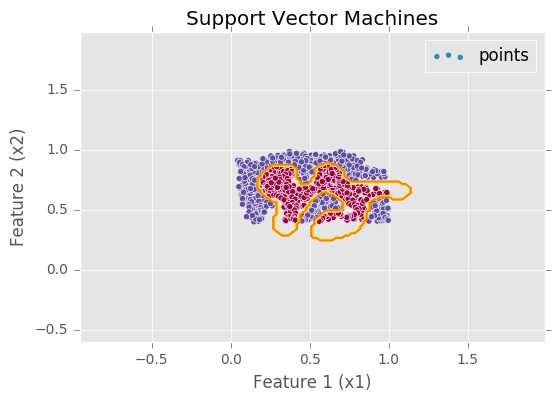

In [14]:
with open("visuals.pickle","rb") as f:
    ss=pickle.load(f)
Z=np.array(ss)
plt.scatter( z1[:, 0], z1[:, 1],c=np.array(z2),cmap=plt.cm.Spectral,label="points")
Z=Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Wistia,label="boundary")
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Support Vector Machines')
plt.legend()
plt.show()